## Business Problem
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create

## Project  Overview
**Project Overview: Analyzing Box Office Trends for Microsoft's New Movie Studio**

**Objective:**  
The objective of this project is to analyze current box office trends and identify the types of films that are performing best in terms of audience reception and financial success. The insights gathered will be used to guide decision-making for Microsoft's new movie studio regarding the types of films to produce.



**Methodology:**  
1. **Data Analysis**:
   - **Genre Analysis**: Identify the most successful genres in terms of box office revenue and audience ratings.
   - **Budget vs. Revenue**: Analyze the relationship between film budgets and box office revenue to understand profitability.
   - **Audience Demographics**: Explore audience demographics for top-performing films to target specific market segments.
   - **Critical Reception**: Evaluate the correlation between critical reviews and box office success.
2. **Insights Generation**:
   - **Genre Preferences**: Determine which genres are currently popular and have high market demand.
   - **Budget Optimization**: Recommend optimal budget ranges based on revenue expectations and risk assessment.
   - **Target Audience Identification**: Identify target audience demographics for tailored marketing and content strategies.
   - **Content Recommendations**: Suggest film themes, storylines, and elements that resonate well with audiences.
3. **Reporting and Presentation**:
   - Prepare a comprehensive report summarizing key findings, insights, and actionable recommendations.
   - Present findings to the head of Microsoft's new movie studio, highlighting opportunities and strategies for success.



**Expected Deliverables:**  
1. Detailed analysis report with data-driven insights and recommendations.
2. Presentation slides summarizing key findings and actionable strategies.
3. Visualizations such as charts, graphs, and tables to support analysis and decision-making.
4. Executive summary highlighting top recommendations and their potential impact on the movie studio's success.

**Success Criteria:**  
- Increase revenue for films produced by Microsoft's movie studio.
- Positive audience feedback and critical acclaim for studio-produced films.
- Achieving competitive positioning in the film industry based on genre and content preferences.

**Risk Factors:**  
- Rapidly changing market trends may impact the relevance of initial findings.
- Competition from established movie studios and streaming platforms.
- Uncertainty in audience preferences and response to new film releases.

In [75]:
# Importing relevant libraries.

import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import chardet
!pip install wordcloud
from wordcloud import WordCloud
 
%matplotlib inline

## Loading Data

In [76]:
# loading csv data 
bom_movie_gross = pd.read_csv("bom.movie_gross.csv.")
tmdb_movies = pd.read_csv("tmdb.movies.csv")
tn_movie_budgets = pd.read_csv("tn.movie_budgets.csv")


In [77]:
# loading sql data 
conn = sqlite3.connect("im.db")
imdb_movie_basics = pd.read_sql_query("SELECT *FROM movie_basics", conn)
imdb_movie_ratings = pd.read_sql_query("SELECT * FROM movie_ratings", conn)

In [78]:
#loading tsv data
with open('rt.reviews.tsv', 'rb') as f:
    rawdata = f.read()
    result = chardet.detect(rawdata)
    encoding = result['encoding']

rt_reviews = pd.read_csv("rt.reviews.tsv" ,sep="\t", encoding= encoding)

with open('rt.movie_info.tsv', 'rb') as f:
    rawdata = f.read()
    result = chardet.detect(rawdata)
    encoding = result['encoding']

rt_movie_info = pd.read_csv("rt.movie_info.tsv" ,sep="\t", encoding= encoding)


## Inspecting Data

In [79]:
bom_movie_gross.head(5)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [80]:
tmdb_movies.head(5)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [81]:
rt_reviews.head(5)

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [82]:
rt_movie_info.head(5)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [83]:
tn_movie_budgets.head(5)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [84]:
imdb_movie_basics.head(5)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [85]:
imdb_movie_ratings.head(5)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


Following the data inspection, I chose to settle on the following data sets:
   - bom.movie_gross.csv
   - rt.movie_info.tsv
   - imdb_movie_ratings 
   - imdb_movie_basics

After reviewing the given data frames, I settled on the aforementioned due to similar patterns such as:
- budgets
- ratings
- run times 
- revenue



## Inspecting selected data sets

## 1.1 bom movie gross

In [86]:
# checking summary of bom movie gross
# checking for null values
# checking for duplicates
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [87]:
bom_movie_gross.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [88]:
#checking for duplicates
bom_movie_gross.duplicated().sum()

0

In [89]:
#checking for summary
rt_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [90]:
#checking for null values
rt_movie_info.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [91]:
# xhecking for duplicates
rt_movie_info.duplicated().sum()

0

## 1.2 imbd movie ratings

In [92]:
# checking for summary
imdb_movie_ratings.info

<bound method DataFrame.info of          movie_id  averagerating  numvotes
0      tt10356526            8.3        31
1      tt10384606            8.9       559
2       tt1042974            6.4        20
3       tt1043726            4.2     50352
4       tt1060240            6.5        21
...           ...            ...       ...
73851   tt9805820            8.1        25
73852   tt9844256            7.5        24
73853   tt9851050            4.7        14
73854   tt9886934            7.0         5
73855   tt9894098            6.3       128

[73856 rows x 3 columns]>

In [93]:
#checking null vales
imdb_movie_ratings.isna().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [94]:
# checking duplicates
imdb_movie_ratings.duplicated().sum()

0

## 1.3 imdb movie basics

In [95]:
#checking for summary
imdb_movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [96]:
#checkig for null values
imdb_movie_basics.isna().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [97]:
#checking for duplicates
imdb_movie_basics.duplicated().sum()

0

Upon further reveiw I decided to proceed with IMDB movie basics and movie ratings

## Data Cleaning

In [98]:
budgets = tn_movie_budgets.copy()

In [99]:
ratings = imdb_movie_ratings.copy()

In [100]:
basics = imdb_movie_basics.copy()

## Inspecting null values

In [101]:
basics.isna().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [102]:
ratings.isna().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [103]:
budgets.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [104]:
# null values present in imdb movie basics, 21 missing values in original title, 31739 missing values in runtime minutes and 5408 missing values in genres.
# Defining a function to return percentage of missing values
def missing_values(basics):
    #Identify the total missing values per column and sort
    miss = basics.isna().sum().sort_values(ascending = False)
    
    #Calculating percentage of missing values and sorting
    percent_miss = (basics.isna().sum()/len(basics)).sort_values(ascending = False)
    
    #Store in dataframe
    missing = pd.DataFrame({'Missing values':miss, 'Percentage %':percent_miss*100})
    
    return missing

missing_vals = missing_values(basics)
missing_vals

,Missing values,Percentage %
runtime_minutes,31739,21.717621
genres,5408,3.700460
original_title,21,0.014369
movie_id,0,0.000000
primary_title,0,0.000000
start_year,0,0.000000


In [105]:
# droping null values
basics.dropna(inplace =True)

In [106]:
# checking for null values
basics.isna().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

In [107]:
# checking for null values
ratings.isna().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [108]:
#checking for duplicates
basics.duplicated().sum()

0

In [109]:
# checking for duplicates
ratings.duplicated().sum()

0

In [110]:
# checking for duplicates
budgets.duplicated().sum()

0

In [111]:
type(budgets)

pandas.core.frame.DataFrame

In [112]:
ratings.isna().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [113]:
## This merged DataFrame will be used for further analysis or processing, combining the ratings data with the basic information about each movie.
imdb_merge = pd.merge(ratings, basics, how= "inner" , on="movie_id")

In [114]:
imdb_merge.head(5)

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"


In [115]:
imdb_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65720 entries, 0 to 65719
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         65720 non-null  object 
 1   averagerating    65720 non-null  float64
 2   numvotes         65720 non-null  int64  
 3   primary_title    65720 non-null  object 
 4   original_title   65720 non-null  object 
 5   start_year       65720 non-null  int64  
 6   runtime_minutes  65720 non-null  float64
 7   genres           65720 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


## Data Cleaning
The lines of code below are cleaning up numeric columns in the "budgets" DataFrame by removing any commas ($) that might be present in the values. This cleaning step ensures that the data is in a format suitable for numerical operations and analysis.

In [116]:
budgets["production_budget"] = budgets["production_budget"].str.replace(r"[\$,]", "", regex=True).astype(np.int64)

In [117]:
budgets["domestic_gross"] = budgets["domestic_gross"].str.replace(r"[\$,]", "",regex=True).astype(np.int64)

In [118]:
budgets["worldwide_gross"] = budgets["worldwide_gross"].str.replace(r"[\$,]", "",regex=True).astype(np.int64)

In [119]:
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


In [120]:
budgets["total_sales"] = budgets["worldwide_gross"] + budgets["domestic_gross"]

In [121]:
budgets["est_proft"] = budgets["total_sales"] - budgets["production_budget"]

In [122]:
budgets["returns"] = budgets["est_proft"] / budgets["production_budget"]

In summary, these lines of code are creating new columns in the "budgets" DataFrame to calculate and store important financial metrics related to movie production and performance. The "total_sales" column represents the combined global and domestic box office sales, "est_proft" estimates the profit after deducting production costs, and "returns" calculates the ROI based on the estimated profit and production budget.

In [123]:
## Checking first five elements
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_sales,est_proft,returns
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3536852904,3111852904,7.322007
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750,876127750,2.133774
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,192524700,-157475300,-0.449929
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831,1531419831,4.632244
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1936903129,1619903129,5.110105


In [124]:
## adding new columns relese_year and release_month

budgets["release_date"] = pd.to_datetime(budgets["release_date"])

budgets["release_year"] = budgets["release_date"].dt.year
budgets["release_month"] = budgets["release_date"].dt.month

In [125]:
#checking data type
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   int64         
 4   domestic_gross     5782 non-null   int64         
 5   worldwide_gross    5782 non-null   int64         
 6   total_sales        5782 non-null   int64         
 7   est_proft          5782 non-null   int64         
 8   returns            5782 non-null   float64       
 9   release_year       5782 non-null   int64         
 10  release_month      5782 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(8), object(1)
memory usage: 497.0+ KB


In [126]:
## checking the release_year and release_month have been added
budgets.head(5)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_sales,est_proft,returns,release_year,release_month
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,3536852904,3111852904,7.322007,2009,12
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750,876127750,2.133774,2011,5
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,192524700,-157475300,-0.449929,2019,6
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831,1531419831,4.632244,2015,5
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1936903129,1619903129,5.110105,2017,12


In [127]:
imdb_merge.head()

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"


## Modifying Genre

In [128]:
# One-hot encode genres from the 'genres' column in imdb_merge DataFrame 
# and merge the encoded data back into the original DataFrame as new columns.

genres_enc = imdb_merge['genres'].str.get_dummies(sep=',')
imdb_merged = pd.concat([imdb_merge, genres_enc], axis = 1)
imdb_merged.head()

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,Action,Adult,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance,0,0,...,0,0,0,1,0,0,0,0,0,0
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary,0,0,...,0,0,0,0,0,0,0,0,0,0
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",1,0,...,0,0,0,0,0,0,0,0,0,0
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller",0,0,...,1,0,0,0,0,0,0,1,0,0


In [129]:
# Display summary information about the 'imdb_merged' DataFrame.
imdb_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65720 entries, 0 to 65719
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         65720 non-null  object 
 1   averagerating    65720 non-null  float64
 2   numvotes         65720 non-null  int64  
 3   primary_title    65720 non-null  object 
 4   original_title   65720 non-null  object 
 5   start_year       65720 non-null  int64  
 6   runtime_minutes  65720 non-null  float64
 7   genres           65720 non-null  object 
 8   Action           65720 non-null  int64  
 9   Adult            65720 non-null  int64  
 10  Adventure        65720 non-null  int64  
 11  Animation        65720 non-null  int64  
 12  Biography        65720 non-null  int64  
 13  Comedy           65720 non-null  int64  
 14  Crime            65720 non-null  int64  
 15  Documentary      65720 non-null  int64  
 16  Drama            65720 non-null  int64  
 17  Family      

In [130]:
# Rename the column 'primary_title' to 'movie' in the 'imdb_merged' DataFrame.
imdb_merged = imdb_merged.rename(columns={'primary_title':'movie'})

In [131]:
# Merge 'budgets' and 'imdb_merged' DataFrames on the 'movie' column using an inner join.
df = pd.merge(budgets,imdb_merged,how='inner', on='movie')

In [132]:
#checking first few rows
df.head(3)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_sales,est_proft,returns,release_year,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,3536852904,3111852904,7.322007,2009,...,0,0,0,0,0,0,0,0,0,0
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750,876127750,2.133774,2011,...,0,0,0,0,0,0,0,0,0,0
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,192524700,-157475300,-0.449929,2019,...,0,0,0,0,1,0,0,0,0,0


In [133]:
# Display summary information about the DataFrame 'df', including column names, non-null count, and data types.
# The output tells us the number of rows (observations) and columns (variables) in the DataFrame, 
# along with the data types of each column and the number of non-null values in each column.
df.info

<bound method DataFrame.info of       id release_date                                        movie  \
0      1   2009-12-18                                       Avatar   
1      2   2011-05-20  Pirates of the Caribbean: On Stranger Tides   
2      3   2019-06-07                                 Dark Phoenix   
3      4   2015-05-01                      Avengers: Age of Ultron   
4      7   2018-04-27                       Avengers: Infinity War   
...   ..          ...                                          ...   
2747  62   2014-12-31                         Stories of Our Lives   
2748  68   2001-07-06                                         Cure   
2749  73   2012-01-13                                    Newlyweds   
2750  78   2018-12-31                                       Red 11   
2751  81   2015-09-29                         A Plague So Pleasant   

      production_budget  domestic_gross  worldwide_gross  total_sales  \
0             425000000       760507625       27763452

In [134]:
# checking first few rows in df dataframe
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_sales,est_proft,returns,release_year,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,3536852904,3111852904,7.322007,2009,...,0,0,0,0,0,0,0,0,0,0
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750,876127750,2.133774,2011,...,0,0,0,0,0,0,0,0,0,0
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,192524700,-157475300,-0.449929,2019,...,0,0,0,0,1,0,0,0,0,0
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831,1531419831,4.632244,2015,...,0,0,0,0,1,0,0,0,0,0
4,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,2726949682,2426949682,8.089832,2018,...,0,0,0,0,1,0,0,0,0,0


## Outliers

Production Budget Outliers:
0      425000000
1      410600000
2      350000000
3      330600000
4      300000000
         ...    
316     95000000
317     95000000
319     95000000
320     94000000
321     93000000
Name: production_budget, Length: 281, dtype: int64

Runtime Outliers:
4       149.0
7       164.0
9       150.0
13      151.0
14      169.0
        ...  
2452     48.0
2616     49.0
2630    150.0
2633    160.0
2714     55.0
Name: runtime_minutes, Length: 113, dtype: float64

Profit Outliers:
0       3111852904
1        876127750
3       1531419831
4       2426949682
5        584969504
           ...    
2032     412106391
2033     412106391
2034     306068651
2484     341235147
2549     369939000
Name: est_proft, Length: 306, dtype: int64


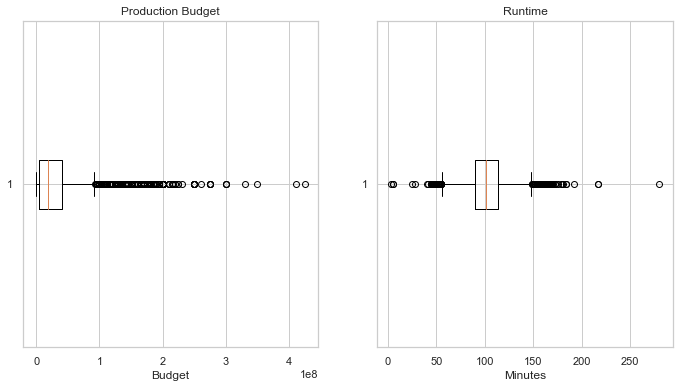

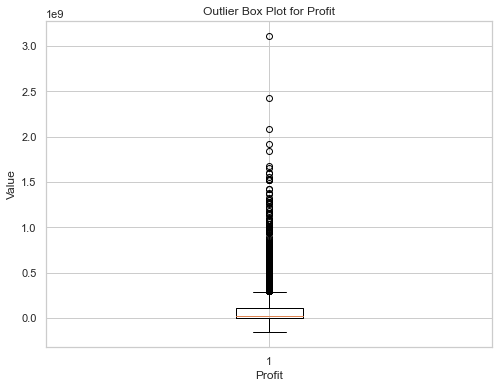

In [135]:
# checking for outliers


# Function to detect outliers using the IQR method
def detect_outliers(data):
    Q1 = data.quantile(0.25)  # Calculate the first quartile (Q1)
    Q3 = data.quantile(0.75)  # Calculate the third quartile (Q3)
    IQR = Q3 - Q1  # Calculate the Interquartile Range (IQR)
    lower_bound = Q1 - 1.5 * IQR  # Calculate the lower bound for outliers
    upper_bound = Q3 + 1.5 * IQR  # Calculate the upper bound for outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]  # Identify outliers
    return outliers

# Detect outliers in production budgets, runtimes, and profits
production_budget_outliers = detect_outliers(df['production_budget'])
runtime_outliers = detect_outliers(df['runtime_minutes'])
profit_outliers = detect_outliers(df['est_proft'])

# Print the outliers
print("Production Budget Outliers:")
print(production_budget_outliers)

print("\nRuntime Outliers:")
print(runtime_outliers)

print("\nProfit Outliers:")
print(profit_outliers)

# Plotting the data with outliers
plt.figure(figsize=(18, 6))

# Box plot for production budgets
plt.subplot(1, 3, 1)
plt.boxplot(df['production_budget'], vert=False)
plt.title('Production Budget')
plt.xlabel('Budget')

# Box plot for runtimes
plt.subplot(1, 3, 2)
plt.boxplot(df['runtime_minutes'], vert=False)
plt.title('Runtime')
plt.xlabel('Minutes')

# Create the box plot for profit
plt.figure(figsize=(8, 6))
plt.boxplot(df['est_proft'])
plt.xlabel('Profit')
plt.ylabel('Value')
plt.title('Outlier Box Plot for Profit')
plt.grid(True)
plt.show()


Retaining outliers in production budget, profit, and runtime ensures that the analysis remains comprehensive and representative of real-world scenarios. It allows for a deeper understanding of the factors driving success and failure in the film industry, supports robust and unbiased statistical analysis, and provides valuable insights for strategic decision-making.


## Analysis 
Questions to answer are:
- what are the profit and loss margins?
- Which is the best rated genre; most profitable genre, genre with highest ratings?
- What is the correlation production budget and profitability?
- What is the correlation between runtime and production budget?


## Profitabilty Distribution

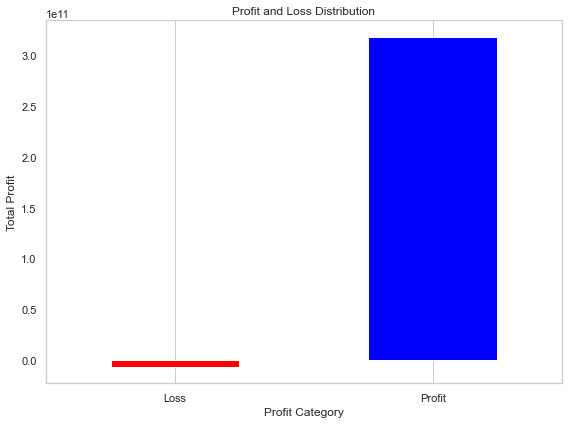

In [136]:
# This code segment categorizes profit data into three categories: 'Loss' for negative profits, 'Profit' for positive profits, and 'Zero' for no profit.
# It then calculates the total profits within each category and creates a bar chart to visualize the profit and loss distribution.
# The visualization helps in understanding the distribution of profits across different categories and aids in decision-making and communication of insights.


# Calculate profit categories (positive, negative, zero)
df['profit_category'] = pd.cut(df['est_proft'], bins=[-float('inf'), 0, float('inf')], labels=['Loss', 'Profit'])

# Group data by profit category and calculate sum of profits within each category
profit_totals = df.groupby('profit_category')['est_proft'].sum()

# Create the bar chart
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
profit_totals.plot(kind='bar', color=['red', 'blue', 'green'])  # Colors for loss, zero, profit
plt.xlabel('Profit Category')
plt.ylabel('Total Profit')
plt.title('Profit and Loss Distribution')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.grid(axis='y')
plt.tight_layout()  # Adjust layout for better presentation
plt.show()

The output shows that the bar representing total profits is significantly larger than the bar representing losses, which are negligible in comparison.

## Genres

Frequency Distribution of Genres:
Drama                      286
Documentary                118
Comedy                      99
Comedy,Drama                91
Comedy,Drama,Romance        75
                          ... 
Family,Horror,Romance        1
Biography,Drama,Mystery      1
Drama,History,Romance        1
Action,Horror,Mystery        1
Family,Sci-Fi                1
Name: genres, Length: 307, dtype: int64


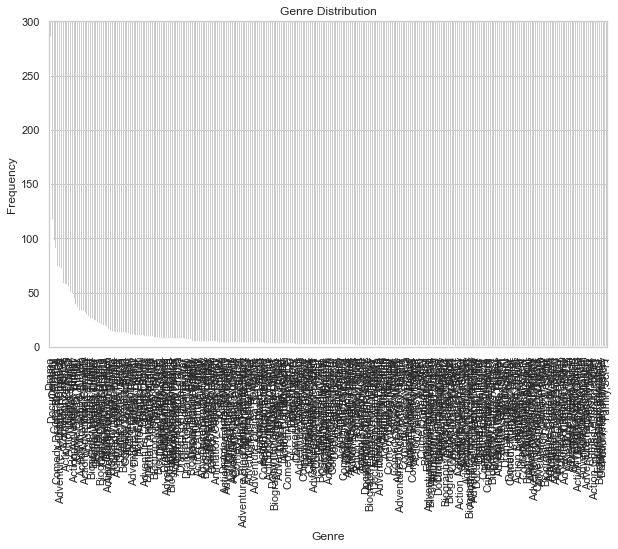

In [137]:
# Creating a bar chart that visualizes the frequency of different genres, with appropriately labeled axes.
# 1. Frequency Distribution
genre_counts = df['genres'].value_counts()
print("Frequency Distribution of Genres:")
print(genre_counts)

# 2. Bar Plot
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.show()

This visualization was too crowded, prompting me to proceed and modify genres to create columns with individual genere types for easier and cleaner visualization.

In [138]:

#seperating the genres and creating columns on each with a count 1 if listed on that entry and 0 if not listed.
sep_genres = imdb_merged['genres'].str.split(',').explode()
encoder = OneHotEncoder()
encoded = encoder.fit_transform(sep_genres.values[:, None])
genres_df = pd.DataFrame(encoded.toarray(), columns=np.ravel(encoder.categories_), dtype='int',) \
                .groupby(sep_genres.index) \
                .sum()

In [139]:
genres_df.head(5)

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [140]:
genre_frequencies = genres_df.sum().sort_values(ascending=False)


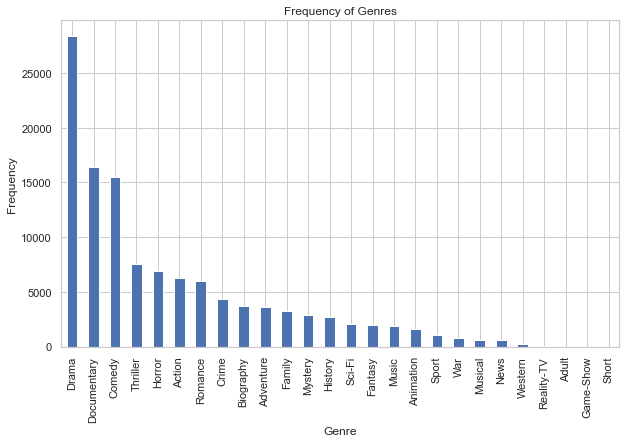

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

In [141]:
# checking for frequency of genres
df_separated = pd.concat([imdb_merged, genres_df], axis=1)

# Visualize the frequency distribution of genres
genre_frequencies = genres_df.sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
genre_frequencies.plot(kind='bar')
plt.title('Frequency of Genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 8))



This plot shows most produced genres with Drama being the most frequent genre.

## Analysis of run time in relation to production budget

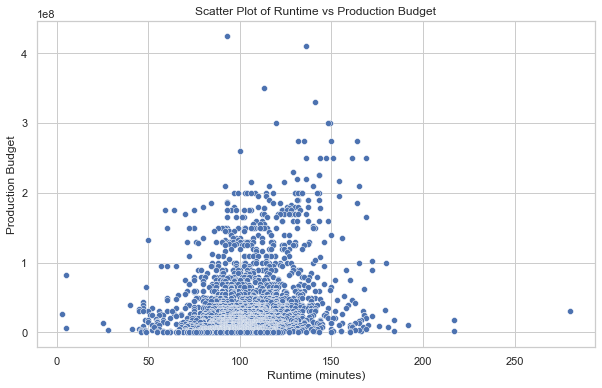

Correlation coefficient: 0.2468214997547672


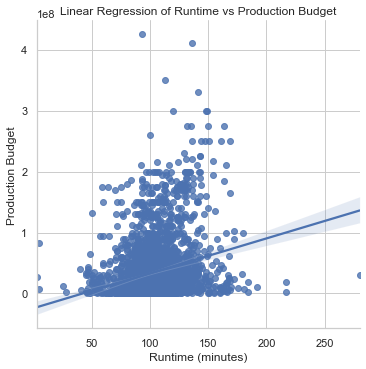

In [142]:
# conducting analysis  the relationship between movie runtime and production budget using:

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='runtime_minutes', y='production_budget', data=df)
plt.title('Scatter Plot of Runtime vs Production Budget')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Production Budget')
plt.show()

# Correlation analysis
correlation = df[['runtime_minutes', 'production_budget']].corr().iloc[0, 1]
print('Correlation coefficient:', correlation)

# Regression analysis
sns.lmplot(x='runtime_minutes', y='production_budget', data=df)
plt.title('Linear Regression of Runtime vs Production Budget')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Production Budget')
plt.show()

In summary, the scatter plot suggests that there's a positive association between a movie's runtime and its production budget. However, there's also some variation in the data, and some movies might not follow this trend.
The correlation coefficient of 0.2468 indicates a weak positive correlation between run time and production budget.
With regard to the regression analysis while there's some scatter, there appears to be a weak positive correlation between runtime and production budget.

## Analysis based on relationship with the factors Budgets, Profits and Genres

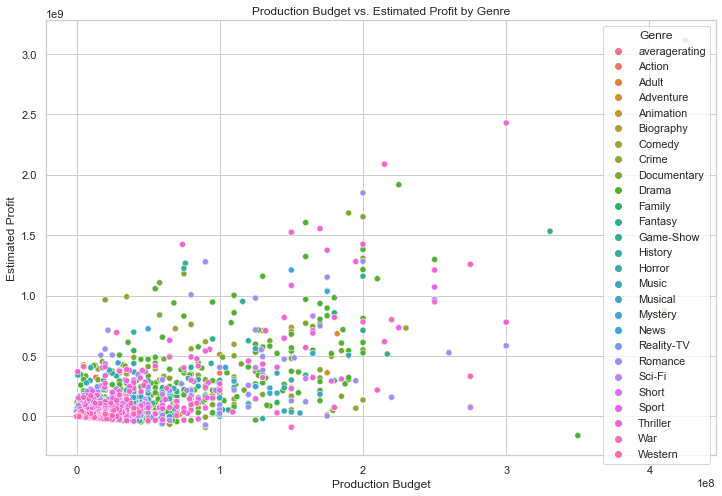

In [143]:
# exploring and visualizing how production budgets and estimated profits are related to different movie genres.


# Concatenate the separated genre DataFrame with the DataFrame containing production budget and estimated profit
df_combined = pd.concat([df_separated, df[['production_budget', 'est_proft']]], axis=1)

# Melt the DataFrame to reshape it for visualization
melted_df = pd.melt(df_combined, id_vars=['production_budget', 'est_proft'], var_name='Genre', value_name='Indicator')

# Filter out rows where the genre indicator is 1
melted_df = melted_df[melted_df['Indicator'] == 1]

# Visualize the relationship between production budget, estimated profit, and genre
plt.figure(figsize=(12, 8))
sns.scatterplot(x='production_budget', y='est_proft', hue='Genre', data=melted_df)
plt.title('Production Budget vs. Estimated Profit by Genre')
plt.xlabel('Production Budget')
plt.ylabel('Estimated Profit')
plt.legend(title='Genre', loc='upper right')
plt.show()



While there's some scatter, the data points appear to be somewhat clustered in the lower right quadrant. This suggests a weak negative correlation between production budget and estimated profit.

In [144]:
# sort the combined_movies_data_copy by Profit in descending order
sorted_by_profit= df.sort_values(by='est_proft', ascending=False)

# extract the Genres column based on the order of the sorted Profit column
top_genres_by_profit = sorted_by_profit['genres']
#Most profitable genres.
top_genres_by_profit_table = sorted_by_profit.loc[:,['genres','est_proft']]
top_genres_by_profit_table.head(20)

,genres,est_proft
0,Horror,3111852904
4,"Action,Adventure,Sci-Fi",2426949682
25,"Action,Adventure,Sci-Fi",2086125489
19,"Action,Adventure,Sci-Fi",1916215444
34,"Action,Adventure,Sci-Fi",1848317790
56,"Action,Crime,Thriller",1681729814
35,"Action,Adventure,Animation",1651102455
116,"Family,Fantasy,Musical",1603213871
117,"Drama,Fantasy,Romance",1603213871
97,"Action,Adventure,Sci-Fi",1553492559


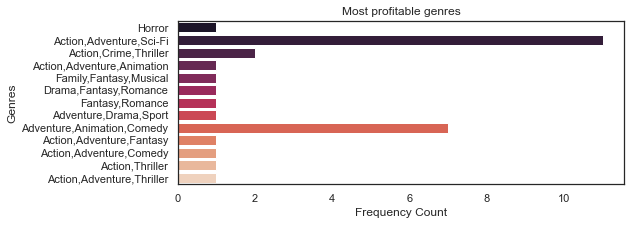

In [145]:
# create a horizontal bar plot of the genre frequencies with higher resolution
sns.set(rc={'figure.figsize':(8,3)}, style='white')
sns.countplot(y=top_genres_by_profit.iloc[:30], palette='rocket')

# set the x-axis label
plt.xlabel('Frequency Count')

# set the y-axis label
plt.ylabel('Genres')

# set the title of the plot
plt.title('Most profitable genres')

# increase the resolution of the plot
plt.savefig('genre_frequencies.png', dpi=300)

# display the plot
plt.show()

The graph suggests that movies categorized under Action, Adventure, Animation are the most popular genre combination, followed by Action, Crime, Thriller and Action, Adventure, Sci-Fi. Genres like Drama, Fantasy, Romance and Fantasy, Romance appear to have a lower frequency count based on the height of their bars.

                           genres  average_production_budget
276                 Family,Sci-Fi                   350000.0
222             Documentary,Sport                   362500.0
99        Adventure,Drama,Mystery                   500000.0
20   Action,Biography,Documentary                   500000.0
286                Horror,Musical                   500000.0
65           Action,Romance,Sport                   500000.0
6    Action,Adventure,Documentary                   850000.0
173       Comedy,Fantasy,Thriller                   900000.0
110              Adventure,Horror                  1000000.0
306                       Western                  1000000.0


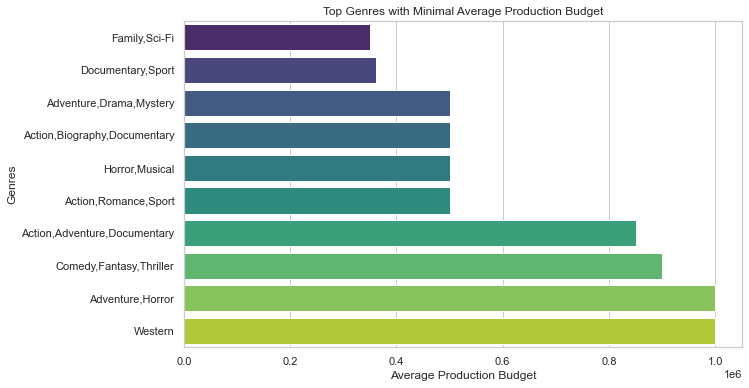

In [146]:
# Group by genre and calculate the average production budget
average_budget_per_genre = df.groupby('genres')['production_budget'].mean().reset_index()

# Rename columns for better readability
average_budget_per_genre.columns = ['genres', 'average_production_budget']

# Sort the genres by average production budget in ascending order
sorted_budget_per_genre = average_budget_per_genre.sort_values(by='average_production_budget')

# Select the top 10 genres with the lowest average production budgets
top_genres_with_minimal_budget = sorted_budget_per_genre.head(10)

# Display the selected top genres
print(top_genres_with_minimal_budget)

# Set the figure size and style
sns.set(rc={'figure.figsize':(10,6)}, style='whitegrid')

# Create a bar plot of the top genres with the lowest average production budgets
sns.barplot(y='genres', x='average_production_budget', data=top_genres_with_minimal_budget, palette='viridis')

# Set the x-axis label
plt.xlabel('Average Production Budget')

# Set the y-axis label
plt.ylabel('Genres')

# Set the title of the plot
plt.title('Top Genres with Minimal Average Production Budget')

# Show the plot
plt.show()


The chart focuses on genres with the minimum average production budget, highlighted in the title "Top Genres with Minimal Average Production Budget". This means the genres with the shortest bars likely represent the most cost-effective movies to produce on average.

                            genres     est_proft
102          Adventure,Drama,Sport  1.523208e+09
283                Fantasy,Romance  1.523208e+09
274         Family,Fantasy,Musical  1.283851e+09
108              Adventure,Fantasy  6.624354e+08
13         Action,Adventure,Sci-Fi  6.588433e+08
282                Fantasy,Musical  5.783411e+08
131  Biography,Documentary,History  5.206793e+08
227           Drama,Family,Fantasy  4.931971e+08
186          Comedy,Romance,Sci-Fi  4.919102e+08
101         Adventure,Drama,Sci-Fi  4.823675e+08
    id release_date                       movie  production_budget  \
2    3   2019-06-07                Dark Phoenix          350000000   
3    4   2015-05-01     Avengers: Age of Ultron          330600000   
4    7   2018-04-27      Avengers: Infinity War          300000000   
10  14   2012-03-09                 John Carter          275000000   
12  17   2016-05-06  Captain America: Civil War          250000000   

    domestic_gross  worldwide_gross  tot

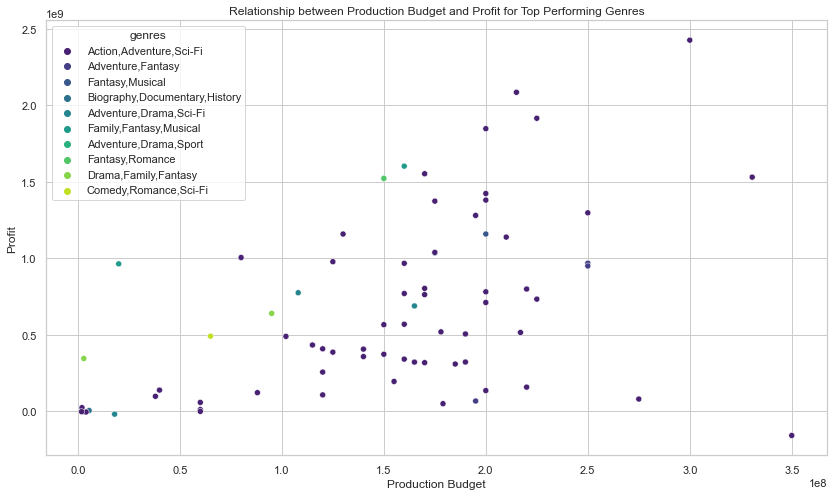

In [147]:

# Analysing and visualizing the relationship between movie genres, production budget, and estimated profit

# Group by genre and calculate the average profit
average_profit_per_genre = df.groupby('genres')['est_proft'].mean().reset_index()

# Sort the genres by average profit in descending order
sorted_profit_per_genre = average_profit_per_genre.sort_values(by='est_proft', ascending=False)

# Select the top 10 genres with the highest average profits
top_performing_genres = sorted_profit_per_genre.head(10)

# Display the selected top genres
print(top_performing_genres)

# Filter the DataFrame to include only top-performing genres
top_genres_list = top_performing_genres['genres'].tolist()
df_top_genres = df[df['genres'].isin(top_genres_list)]

# Display the filtered DataFrame
print(df_top_genres.head())

# Set the figure size and style
sns.set(rc={'figure.figsize':(14,8)}, style='whitegrid')

# Create a scatter plot
sns.scatterplot(data=df_top_genres, x='production_budget', y='est_proft', hue='genres', palette='viridis')

# Set the x-axis label
plt.xlabel('Production Budget')

# Set the y-axis label
plt.ylabel('Profit')

# Set the title of the plot
plt.title('Relationship between Production Budget and Profit for Top Performing Genres')

# Show the plot
plt.show()


This plot attempts to analyse the relationship between profit, production budget and top performing genres. There seems to be a corelation with some outliers. The darker huesseem to  mid to higher production ranges with  limited profitabilty with some outliers.
The presence of outliers highlights the importance of not relying solely on correlation. Even within top genres, some movies might outperform or underperform expectations due to various factors.
Action, adventure scifi and adventure fantasy have higher production budgets with profitability signifiacntly varying and the lighter hues have smaller production budgets with the least outliers.

      id release_date                                        movie  \
0      1   2009-12-18                                       Avatar   
1      2   2011-05-20  Pirates of the Caribbean: On Stranger Tides   
2      3   2019-06-07                                 Dark Phoenix   
3      4   2015-05-01                      Avengers: Age of Ultron   
4      7   2018-04-27                       Avengers: Infinity War   
...   ..          ...                                          ...   
2747  62   2014-12-31                         Stories of Our Lives   
2748  68   2001-07-06                                         Cure   
2749  73   2012-01-13                                    Newlyweds   
2750  78   2018-12-31                                       Red 11   
2751  81   2015-09-29                         A Plague So Pleasant   

      production_budget  domestic_gross  worldwide_gross  total_sales  \
0             425000000       760507625       2776345279   3536852904   
1            

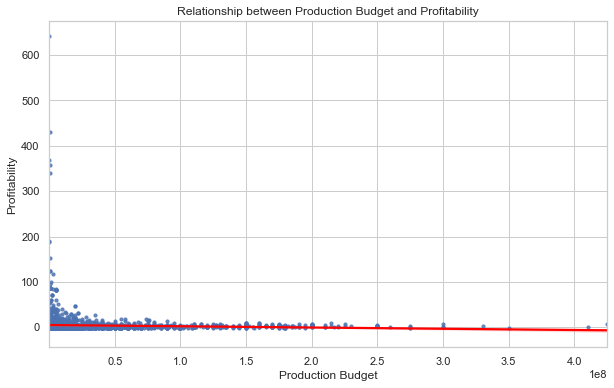

In [148]:

# Check the columns to ensure they exist
print(df)

# Calculate profit
df['profit'] = df['est_proft'] - df['production_budget']

# Display the first few rows to check the calculation
print(df[['genres', 'production_budget', 'est_proft']].head())

# Calculate profitability (profitability = profit / production_budget), handling any division by zero cases
df['profitability'] = df.apply(lambda row: row['profit'] / row['production_budget'] if row['production_budget'] != 0 else 0, axis=1)

# Display the first few rows to check the calculation
print(df[['genres', 'production_budget', 'est_proft', 'profitability']].head())

# Calculate the correlation between production budget and profitability
correlation = df['production_budget'].corr(df['profitability'])

# Display the correlation
print(f"Correlation between production budget and profitability: {correlation}")

# Set the figure size and style
sns.set(rc={'figure.figsize':(10,6)}, style='whitegrid')

# Create a scatter plot with a regression line
sns.regplot(data=df, x='production_budget', y='profitability', scatter_kws={'s':10}, line_kws={'color':'red'})

# Set the x-axis label
plt.xlabel('Production Budget')

# Set the y-axis label
plt.ylabel('Profitability')

# Set the title of the plot
plt.title('Relationship between Production Budget and Profitability')

# Show the plot
plt.show()


There is a clear downward trend, indicating that as the production budget increases, the profitability tends to decrease. This is evidenced by the red regression line which slopes downward.

## Conclusion
From the analysis, the a number of conclusions can be made based on the leading questions.

Which is the best rated genre; most profitable genre, genre with highest ratings?

The best rated genre is Drama and Action,Adventure,Sci-Fi.

The most profitable genre is Action,Adventure,Sci-Fi

Which are the most expensive genres and cheapest genres to produce?

The cateogory of action adventure movies are the most expensive to produce. Action,Adventure,Sci-Fi. being the most expensice action adventure movie to produce

Drama, comedy and thriller movies are the cheapest to produce.

What is the correlation oroduction budget and profitabilitys?

There is a downward trend indicating higher budgets may see minimal profits. This however is subject outliers with some of the top rate genres making losses.

What is the correlation between runtime and budget?

There is weak positive correlation between budget and runtime.


## Recommendations

Based on the business problem and the findings, I recommend that:

1.Microsoftstudios can choose to produce either Drama or Action,Adventure,Sci-Fi.

Microsoft studios can start by producing drama movies and variation like damma, comedy, animation since they are cheap to produce and relatively profitable compared to other genres and they have good ratings.

After increasing viewership of their movies, Microsoft studios can proceed to produce Action,Adventure,Sci-Fi which is the most profitable but expensive to produce. Microsoft owns popular video game franchises (Halo, Gears of War) with established storylines and fan bases. Adapting these to movies or TV shows could be a strategic entry point, leveraging existing intellectual property (IP).

2.Microsoft should commission other studios to recommend the best distribution channel for its movies. We could not do this since the data was not available.

3.Microsoft should leverage on its already existing presence and budget to procure good show writers. A well-written script with strong execution can lead to success even with a lower budget. Invest in script development and focus on high-concept stories with broad appeal.

4.Later on Microsoft studios should consider a study on the market share and how acquiring smaller independent studios would help them grow their market share and viewership.